In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
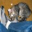

In [6]:
X_test[0]

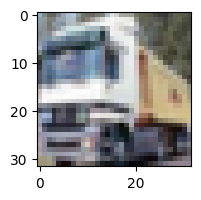

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train[:5]


In [9]:
y_train=y_train.reshape(-1,)

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

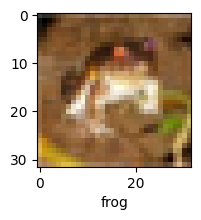

In [11]:
plot_sample(X_train,y_train,0)

In [12]:
X_train= X_train/255
X_test=X_test/255

In [13]:
cnn= models.Sequential([
               #cnnn
            layers.Conv2D(filters=30, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),

            layers.Conv2D(filters=60,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),
              #dense
            layers.Flatten(),
            layers.Dense(64,activation="relu"),
            layers.Dense(10,activation="softmax")


             ])


In [14]:
cnn.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])


In [17]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7301 - accuracy: 0.7469
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6948 - accuracy: 0.7582
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6602 - accuracy: 0.7682
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6268 - accuracy: 0.7814
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5945 - accuracy: 0.7921
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.5627 - accuracy: 0.8017
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5343 - accuracy: 0.8124
Epoch 8/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.5090 - accuracy: 0.8216
Epoch 9/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.4837 - accuracy: 0.8291
Epoch 10/10
1563/1563 [==============================] - 67s 43m

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0767 - accuracy: 0.6865


[1.0766558647155762, 0.6865000128746033]